Think of Python as a builder. They have a mental skillset but often find themselves needing to complement that skillset with physical tools, for example to measure a sheet of concrete or to nail some nails into a frame. This is where **modules** come in. 

**Modules** are like a toolboxes that enable the data scientist the flexibility and power of calling pre-written code (methods) from pre-existing Classes. 

In [6]:
# Import modules
import numpy as np
import pandas as pd

By default Jupyter will restrict our view our the entire width of the dataframe. I like to turn this off unless the dataframe is significant dimensionality.

In [22]:
# Turn off max columns so we can view the entire dataframe width
pd.set_option('display.max_columns', None)

In [20]:
# Reading in our data to our assigned variables 'df'
df = pd.read_csv('all_seasons.csv')

Having imported the necessery tools for our analysis and imported our data, let's take a high level look at out dataset.

I have downloaded this dataset from Kaggle and I know that it's pretty useable already. However, most often our data won't be so readily useable, if we have for example scrapped it from a webpage or used an API call.

Let's begin by visualising the dataset by calling the ".head()" method on our dataframe variable "df". This is the third time we have called a Pandas method. The first time was when we turned off max columns with "pd.set_option" and the second time was when we read in our csv file into our notebook with "pd.read_csv()". 

If you notice at the top where we called in the modules/libraries/Classes, we assigned an alias to the Numpy and Pandas classes. This is to save us time when we call methods from each class from thereon out. Instead of having to write "Pandas.set_option()" or "Numpy.mean()", we can use the Class aliases "pd.set_option()" and "np.mean()".

In [23]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


I typically like to get a feel for the dimensions of the dataset after visualising the top.

In [26]:
print(f'The dataframe contains {df.shape[0]} rows and {df.shape[1]} columns.')

The dataframe contains 11700 rows and 22 columns.


This can also be achieved without calling an index, returning a tuple.

In [28]:
df.shape

(11700, 22)

I now normally like to develop a quick TLDR of my dataset with some summary statistics. This is extremely easy using the ".describe()" methods of the Pandas class.

In [30]:
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,5849.500000,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,3377.643409,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2924.750000,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,5849.500000,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,8774.250000,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,11699.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


Averaging 36.1 points in a season is pretty unheard of. I know who it was, but for all the viewers at home lets bring up this record using two more Pandas methods in one line of code. First we filter the dataframe to using ".iloc()" (integer location) and then call the ".idxmax()" method the return the max value in the specified column. 

The result is the row/record where this value lies.

In [32]:
df.iloc[df['pts'].idxmax()]

Unnamed: 0                   10507
player_name           James Harden
team_abbreviation              HOU
age                           29.0
player_height               195.58
player_weight             99.79024
college              Arizona State
country                        USA
draft_year                    2009
draft_round                      1
draft_number                     3
gp                              78
pts                           36.1
reb                            6.6
ast                            7.5
net_rating                     6.3
oreb_pct                     0.023
dreb_pct                     0.157
usg_pct                      0.396
ts_pct                       0.616
ast_pct                      0.394
season                     2018-19
Name: 10507, dtype: object

Let's now finish off the data quality checks before diving into the proper EDA using various techniques.

In [34]:
# Checking if there are any numm values in each servies/columns and then summing all nulls
df.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

# Now the fun begins

Now we've crossed our T's and dotted our I's to ensure our data is of high quality and we don't have to do any data preprocessing and cleaning, let's go over some EDA techniques to get a better feel for the characteristics of our data.

**Note**

To test myself, I am going to recreate each method calculation in my own code, aka Pure Python. I will denote methods with "With methods" and my own code with "Without methods".

## Estimates of Location

**Mean:** The sum of all values divided by the number of values.

In [35]:
# With methods
df['reb'].mean()

3.5649572649572736

In [63]:
# Without methods
def my_mean(x):
    n_students = len(x)
    sentinel = 0
    total = 0
    
    while sentinel < n_students:
        age = x[sentinel]
        total += age
        sentinel += 1
    mean = total / n_students
    return mean

my_mean(df['reb'])

3.5649572649572736

**Trimmed Mean**: Involves removing a user-specified fixed set of numbers from the tails of a distribution and taking the mean from the remaining array.

This techniques helps reduce the impact of outliers and is widely preferred to the standard mean.

In [50]:
# With methods
from scipy.stats import trim_mean

print(f'Without any trim: {trim_mean(df["reb"], 0)}')
print(f'With 1% trim on each end: {trim_mean(df["reb"], 0.01)}')
print(f'With 5% trim on each end: {trim_mean(df["reb"], 0.05)}')
print(f'With 20% trim on each end: {trim_mean(df["reb"], .2)}')

Without any trim: 3.564957264957265
With 1% trim on each end: 3.5056514913657773
With 5% trim on each end: 3.3610161443494775
With 20% trim on each end: 3.1016381766381764


In [53]:
# Without methods

**Weighted Mean:** Same as mean but with every value multiplied with a user specified $  x_{i} $ before summing and dividng by the number of values.

This techniques is useful when some values are intrinsically more valuable than others or the data collected does not equally represent the different groups we are measuring.

In [61]:
print(f'Using player heights to weight the mean may make sense in this situation: {np.average(df["reb"], weights = df["player_height"])}')

Using player heights to weight the mean may make sense in this situation: 3.6129478757687186


**Median:** The middle value in a numerically sorted array.

In [70]:
# With methods
df['reb'].median()

3.0

In [83]:
# Without methods
def my_median(array):
    sorted_list = sorted(array)
    if len(sorted_list) % 2 == 1:
        return array[len(sorted_list) // 2]
    else:
        return array[len(sorted_list) // 2 - 1] + array[len(sorted_list) // 2] / 2

my_median(df['reb'])

3.9

**Weighted Median:** We multiply every value with some weight $x_i$ and then pick the middle value such that the sum of values to the left of the median are the same as the sum of values to the rights of the median.

In [ ]:
# With methods


In [84]:
# Without methods
def my_weighted_median(df, median_col, weight_col):
    df = df.sort_values(median_col)
    cumsum = df[weight_col].cumsum()
    cutoff = df[weight_col].sum() / 2
    return df[cumsum >= cutoff][median_col].iloc[0]

my_weighted_median(df, 'reb', 'player_height')

3.0

**Percentile:** The value such that P percent of the data lay below it.

In [85]:
np.percentile(df['reb'], 25)

1.8

## Estimates of Variability (Dispersion)

Measuring variability is the second dimension to summarising a feautre (column, series, 1-D array). Variability is central to statistics and we can generate a lot of useful information about our dataset here.

**Variance:** Average of the squared deviations, where we have summed squared deviations from the mean and dividied by *n*-1 where *n* is the number of values. AKA *mean squared error*.

In [87]:
# With methods
from statistics import variance

variance(df['reb'])

6.187647874060389

In [88]:
# Without methods

**Standard Deviation:** The square root of the variance, bringing result to the same scale as the original data.

The superior choice to mean absolute deviation because working with squared values is easier that absolute value particularly in statistical modelling.

In [89]:
# With methods
from statistics import stdev

stdev(df['reb'])

2.487498316393478

In [90]:
# Without methods
def my_stdev(array):
    mean = my_mean(array)
    sq_distances = []
    for value in array:
        distance = value - mean
        sq_distances.append(distance ** 2)
    total_distances = sum(sq_distances)
    average_squared_distances = total_distances / (len(array))
    return average_squared_distances ** (1/2)

my_stdev(df['reb'])    

2.487392010775098

**Mean Absolute Deviation:** The mean of the absolute deviations from the mean.

In [91]:
# With methods
np.mean(np.absolute(df['reb'] - np.mean(df['reb'])))

1.9081393819855392

In [92]:
# Without methods

**Median Absolute Deviation from the Median:** The median of the absolute deviations from the median (cheers Geoff)

In [94]:
# With methods
np.median(np.absolute(df['reb'] - np.median(df['reb'])))

1.4

In [95]:
# Without methods


**Minimum:** Smallest value in an array of sorted data.

In [100]:
# Using methods
min(df['reb'])

0.0

In [111]:
# Without methods
def my_min(array):
    min = array[0]
    for i in array:
        if i < min:
            min = i
    return min

my_min(df['reb'])

0.0

**Maximum:** Smallest value in an array of sorted data.

In [112]:
max(df['reb'])

16.3

In [110]:
# Without methods
def my_max(array):
    max = array[0]
    for i in array:
        if i > max:
            max = i
    return max

my_max(df['reb'])

16.3

**Interquartile Range:** Difference between 75th and 25th percentile.

In [136]:
np.percentile(df['reb'], [75, 25])

array([4.7, 1.8])

## Exploring the Data Distribution

**Boxplots:** Useful way to summarise the distribution of your data in your dataset.

<AxesSubplot:>

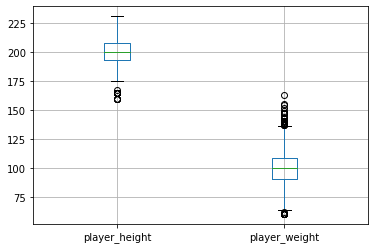

In [176]:
# Using Pandas library
df.boxplot(column=['player_height', 'player_weight'], by=None, ax=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1e265e280>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1e265e9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1e264feb0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1e2669100>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1e2669490>,
 'means': []}

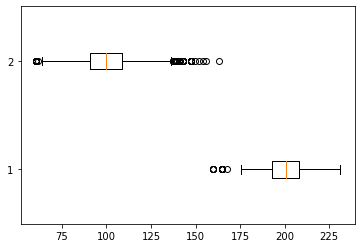

In [183]:
# Using matplotlib, the more customisable (using key word arguements) and generally accepted standard plotting library in Python
plt.boxplot(x=[df['player_height'], df['player_weight']], vert=False)

**Frequency Table:** A frequency table of a variable divides up the variable range into equally spaced seg‐
ments and tells us how many values fall within each segment.

Creating a frequency table is often a preprocessing step prior to generating a histogram.

In [157]:
frequency_table = df.copy()
frequency_table["freq"] = pd.cut(df["player_height"], 10)
frequency_table.groupby("freq")["Unnamed: 0"].count().reset_index() # Creates a frequency table of values based on the specified series and segment number

,freq,Unnamed: 0
0,"(159.949, 167.132]",18
1,"(167.132, 174.244]",1
2,"(174.244, 181.356]",190
3,"(181.356, 188.468]",1251
4,"(188.468, 195.58]",1468
5,"(195.58, 202.692]",3014
6,"(202.692, 209.804]",3712
7,"(209.804, 216.916]",1882
8,"(216.916, 224.028]",138
9,"(224.028, 231.14]",26


<AxesSubplot:ylabel='Frequency'>

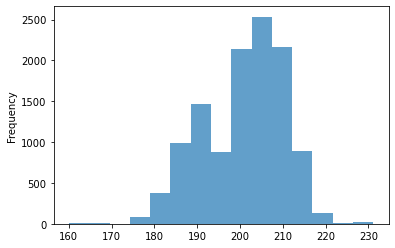

In [170]:
# Using Pandas library
df['player_height'].plot.hist(bins=15, alpha=.7)

(array([5.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.500e+01,
        0.000e+00, 5.600e+01, 0.000e+00, 1.090e+02, 0.000e+00, 2.660e+02,
        4.690e+02, 0.000e+00, 5.160e+02, 0.000e+00, 7.990e+02, 0.000e+00,
        6.690e+02, 0.000e+00, 8.740e+02, 0.000e+00, 9.780e+02, 0.000e+00,
        1.162e+03, 0.000e+00, 1.123e+03, 0.000e+00, 1.413e+03, 1.176e+03,
        0.000e+00, 9.920e+02, 0.000e+00, 6.940e+02, 0.000e+00, 1.960e+02,
        0.000e+00, 8.600e+01, 0.000e+00, 4.400e+01, 0.000e+00, 8.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 1.600e+01, 3.000e+00]),
 array([160.02      , 161.36188679, 162.70377358, 164.04566038,
        165.38754717, 166.72943396, 168.07132075, 169.41320755,
        170.75509434, 172.09698113, 173.43886792, 174.78075472,
        176.12264151, 177.4645283 , 178.80641509, 180.14830189,
        181.49018868, 182.83207547, 184.17396226, 185.51584906,
        186.85773585, 1

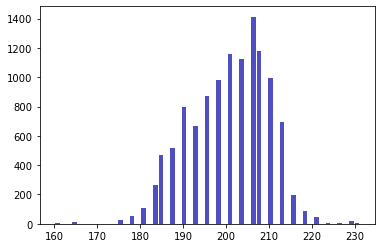

In [175]:
# Alternatively, importing matplotlib (standard plotting library that delivers greater customaisability) 
import matplotlib.pyplot as plt
plt.hist(x=df['player_height'],
         bins='auto',
         color='#0504aa',
         alpha=.7,
         rwidth=.8
)

**Density Plot:** Essentially a histogram with a curve that represents the distribution of data values as a continuous line and the y-axis is plottedas

<AxesSubplot:ylabel='Density'>

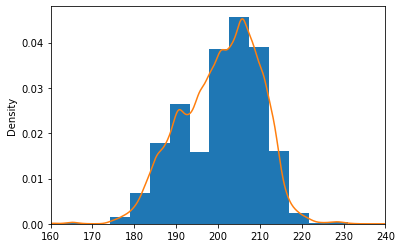

In [191]:
ax = df['player_height'].plot.hist(
		density=True,
  		xlim=[160, 240],
    	bins=15)

df['player_height'].plot.density(ax=ax)

## Exploring Binary and Categorical Data

****Mode:** Value occuring with the highest frequency.

In [192]:
df['player_height'].mode()

0    205.74
dtype: float64

**Expected Value:** Sum of each value multiplied by probability of occurance.

In [196]:
# The expected value and variance of 100 fair coin flips
from scipy.stats import binom
binom.stats(n=100, p=0.5)

(array(50.), array(25.))

In [199]:
# The expected value and variance of 100 biased coin flips with 30% probability of getting heads
# Probability of getting heads = 1 x 0.3, and variance = 0.3 x 0.7 ('p' of failure)
binom.stats(n=100, p=0.3)

(array(30.), array(21.))

**Bar Chart:** Visualises the count of occurences of a categorical value, where the length of the bar is dictated by said count.

I'm quickly generating a count table to show us the representation of each team in the dataset. The Pandas groupby methods is really helpful and powerful for aggregations. I recommend exploring this further in your own time.

In [224]:
# Creating a new table to store counts of rows by team. This differs from the above frequency table which corresponds to 
# binning counts of occureances within numeric ranges.
representation = df.groupby(['team_abbreviation']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
representation.head(10)

,team_abbreviation,counts
6,CLE,411
32,TOR,408
13,LAC,408
16,MIA,405
11,HOU,402
26,PHI,401
7,DAL,401
0,ATL,400
35,WAS,399
30,SAS,395


Text(0, 0.5, 'Count of records')

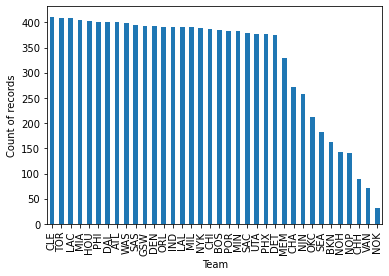

In [228]:
# You would need to format this a little nicer in a formal presentaiton. I chose to visualise all 36 records as there is not much 
# discrenable change among the first 75%  of the dataset.
ax = representation.iloc[ : 36, : ].plot.bar(x='team_abbreviation', y='counts', legend=False)
ax.set_xlabel('Team')
ax.set_ylabel('Count of records')

Text(0, 0.5, 'Count of records')

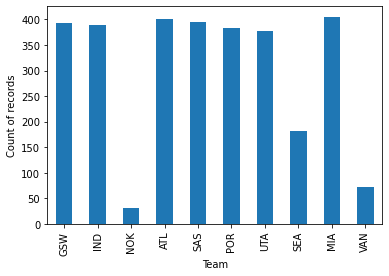

In [231]:
# Here is another way we can take a random sample of our counts table to visualise
representation_sample = representation.sample(10)
ax = representation_sample.plot.bar(x='team_abbreviation', y='counts', legend=False)
ax.set_xlabel('Team')
ax.set_ylabel('Count of records')